# Project: Star Wars Survey

In this project, we'll be analyzing data on the Star Wars movies

## Context
While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: ** does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

## Goal
In this project, we'll be cleaning and exploring the data set


## Overview

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

We need to specify an encoding because the data set has some characters that aren't in Python's default utf-8 encoding. More information about character encoding [on developer Joel Spolsky's blog](http://www.joelonsoftware.com/articles/Unicode.html)

## data information 
The data has several columns, including:

* RespondentID - An anonymized ID for the respondent (person taking the survey)
* Gender - The respondent's gender
* Age - The respondent's age
* Household Income - The respondent's income
* Education - The respondent's education level
* Location (Census Region) - The respondent's location
* Have you seen any of the 6 films in the Star Wars franchise? - * Has a Yes or No response
* Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Exploring the data and Looking for any strange values in the columns and rows.

In [4]:
star_wars.head(10)

RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           Response                      
1                                                Yes                      
2                                                NaN                      
3                                                 No                      
4                                                Yes                      
5                                                Yes                      
6                                                Yes                      
7                                                Yes                      
8                                                Yes                      
9                                                Yes                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
0           Star Wars: Episode I  The Phantom Menace                                    
1           Star Wars: Episode I  The Phantom Menace                                    
2                                                NaN                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    
5           Star Wars: Episode I  The Phantom Menace                                    
6           Star Wars: Episode I  The Phantom Menace                                    
7           Star Wars: Episode I  The Phantom Menace                                    
8           Star Wars: Episode I  The Phantom Menace                                    
9           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
0  Star Wars: Episode II  Attack of the Clones   
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   
6  Star Wars: Episode II  Attack of the Clones   
7  Star Wars: Episode II  Attack of the Clones   
8  Star Wars: Episode II  Attack of the Clones   
9  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
0  Star Wars: Episode III  Revenge of the Sith   
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   
5  Star Wars: Episode III  Revenge of the Sith   
6  Star Wars: Episode III  Revenge of the Sith   
7  Star Wars: Episode III  Revenge of the Sith   
8  Star Wars: Episode III  Revenge of the Sith   
9  Star Wars: Episode III  Revenge of the Sith   

                          Unnamed: 6  \
0  Star Wars: Episode IV  A New Hope   
1  Star Wars: Episode IV  A New Hope   
2                                NaN   
3                                NaN   
4  Star Wars: 

In [5]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [6]:
# Removing any rows where RespondentID is NaN
print(star_wars.shape)
star_wars.dropna(subset=['RespondentID'],inplace=True)
print(star_wars.shape)

(1187, 38)
(1186, 38)


## Cleaning and Mapping Yes/No Columns
Take a look at the next two columns, which are:

* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?

Both represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question

In [7]:
questions=["Have you seen any of the 6 films in the Star Wars franchise?", "Do you consider yourself to be a fan of the Star Wars film franchise?"]

In [50]:
# Displaying unique values in these columns
for question in questions:
    print(star_wars[question].value_counts(dropna=False),"\n")

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64 



Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison

In [9]:
# define a mapping from each value
yes_no = {
    "Yes": True,
    "No": False
}

# call the map() function to perform the mapping
for question in questions:
    star_wars[question]= star_wars[question].map(yes_no)
    

In [51]:
# Displaying unique values in these columns
for question in questions:
    print(star_wars[question].value_counts(dropna=False),"\n")

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64 



Now, both columns contain only the values:

* True, 
* False, 
* NaN.

## Cleaning and Mapping Checkbox Columns
The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question:

    Which of the following Star Wars films have you seen? Please select all that apply.
    
The columns for this question are:

* Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
* Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

In [11]:
check_list=["Which of the following Star Wars films have you seen? Please select all that apply.",
           "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8"]

In [12]:
unique_val=star_wars[check_list].apply(pd.value_counts)
# print(unique_val.index)
yes_no_nan={np.NaN: False}
for index in unique_val.index:
    if index not in yes_no_nan:
        yes_no_nan[index]=True
yes_no_nan

{nan: False,
 'Star Wars: Episode IV  A New Hope': True,
 'Star Wars: Episode II  Attack of the Clones': True,
 'Star Wars: Episode III  Revenge of the Sith': True,
 'Star Wars: Episode I  The Phantom Menace': True,
 'Star Wars: Episode V The Empire Strikes Back': True,
 'Star Wars: Episode VI Return of the Jedi': True}

In [13]:
# call the map() function to perform the mapping
for c in check_list:
    star_wars[c]= star_wars[c].map(yes_no_nan)

Next, we'll need to rename the columns to better reflect what they represent.

In [14]:
col_rename={}
i=0
for name in check_list:
    i+=1
    if name not in col_rename:
        col_rename[name]="seen_"+str(i)
col_rename

{'Unnamed: 4': 'seen_2',
 'Unnamed: 5': 'seen_3',
 'Unnamed: 6': 'seen_4',
 'Unnamed: 7': 'seen_5',
 'Unnamed: 8': 'seen_6',
 'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1'}

In [15]:
star_wars = star_wars.rename(columns=col_rename)

In [16]:
check_list_2=[]
for name in col_rename:
    check_list_2.append(col_rename.get(name))
check_list_2.sort()
check_list_2

['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

In [17]:
# check the result
star_wars[check_list_2].apply(pd.value_counts)

seen_1  seen_2  seen_3  seen_4  seen_5  seen_6
False     513     615     636     579     428     448
True      673     571     550     607     758     738

## Cleaning the Ranking Columns
The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

* Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
* Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
* Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
* Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
* Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
* Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [18]:
# Numeric conversion
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [19]:
col_favorite_rename={}
i=0
for name in star_wars.columns[9:15]:
    i+=1
    if name not in col_rename:
        col_favorite_rename[name]="ranking_"+str(i)
col_favorite_rename

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
 'Unnamed: 10': 'ranking_2',
 'Unnamed: 11': 'ranking_3',
 'Unnamed: 12': 'ranking_4',
 'Unnamed: 13': 'ranking_5',
 'Unnamed: 14': 'ranking_6'}

In [20]:
star_wars = star_wars.rename(columns=col_favorite_rename)


In [21]:
favorite_list=[]
for name in col_favorite_rename:
    favorite_list.append(col_favorite_rename.get(name))
favorite_list.sort()
favorite_list

['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']

In [22]:
# check the result
star_wars[favorite_list].apply(pd.value_counts)

ranking_1  ranking_2  ranking_3  ranking_4  ranking_5  ranking_6
1.0        129         32         36        204        289        146
2.0         71        116         47        135        235        232
3.0        130        103        150        127        106        220
4.0        237        183        182        130         47         57
5.0        100        300        203         79        118         36
6.0        168        102        217        161         41        145

## Finding the Highest-Ranked Movie
As a reminder we want to answer this question:

    Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?
    
Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly.

To do this, we'll take the mean of each of the ranking columns.

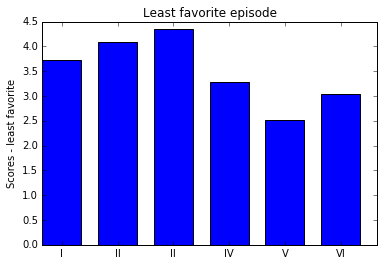

In [75]:
ind=np.arange(6)
width = 0.35 
fig, ax = plt.subplots()
ax.bar(ind,star_wars[favorite_list].mean(),width=width*2)
ax.set_ylabel('Scores - least favorite')
ax.set_title('Least favorite episode')
ax.set_xticks(ind+(width*2) / 2)
ax.set_xticklabels(('I', 'II', 'II', 'IV', 'V','VI'))

In [55]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)/star_wars.shape[0]

True     0.46543
NaN      0.29511
False    0.23946
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: float64

To discuss our result, we need to remenber that a lower ranking is better because of that in the question:
        
        Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.

This is the list of movies with their ranking number

* Star Wars: Episode I The Phantom Menace - ranking 1
* Star Wars: Episode II Attack of the Clones - ranking 2
* Star Wars: Episode III Revenge of the Sith - ranking 3
* Star Wars: Episode IV A New Hope - ranking 4
* Star Wars: Episode V The Empire Strikes Back - ranking 5
* Star Wars: Episode VI Return of the Jedi - ranking 6

The most favorite episode is **the Episode V The Empire Strikes Back. **

That make sense because we have 46% of respondents who consider themself like a star wars fan and more than the half who have seen the episode: V The Empire Strikes Back. So like the team, the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch.

## Finding the Most Viewed Movie

Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type. When we call methods like pandas.DataFrame.sum() or mean(), they treat Booleans like integers. They consider True a 1, and False a 0. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

In [57]:
# Compute the sum of each of the seen columns
star_wars[check_list_2].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

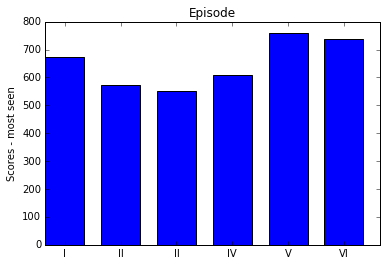

In [71]:
ind=np.arange(6)
width = 0.35 
fig, ax = plt.subplots()
ax.bar(ind,star_wars[check_list_2].sum(),width=width*2)
ax.set_ylabel('Scores - most seen')
ax.set_title('Episode most seen')
ax.set_xticks(ind + (width*2) / 2)
ax.set_xticklabels(('I', 'II', 'II', 'IV', 'V','VI'))

The most seen episode is also **the Episode V The Empire Strikes Back. **

The Episode V The Empire Strikes Back is the most favorite and the most seen episode.

** That make sense because we have 46% of respondents who consider themself like a star wars fan and more than the half who have seen the episode: V The Empire Strikes Back. So like the team, the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch.**

## Exploring the Data by Binary Segments
We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

* Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
* Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
* Gender - Male or Female

We can split a dataframe into two groups based on a binary column by creating two subsets of that column. 
The subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

Let's start with Gender

In [59]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

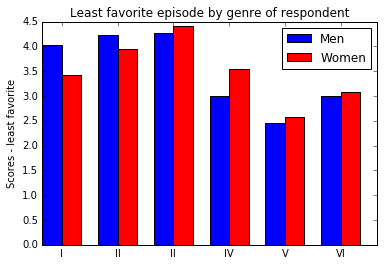

In [76]:
ind=np.arange(6)
width = 0.35 
fig, ax = plt.subplots()

rects1=ax.bar(ind,males[favorite_list].mean(),width=width)
rects2=ax.bar(ind+width,females[favorite_list].mean(),width=width,color='r')

ax.set_ylabel('Scores - least favorite')
ax.set_title('Least favorite episode by genre of respondent')
ax.set_xticks((ind) + width)
ax.set_xticklabels(('I', 'II', 'II', 'IV', 'V','VI'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))

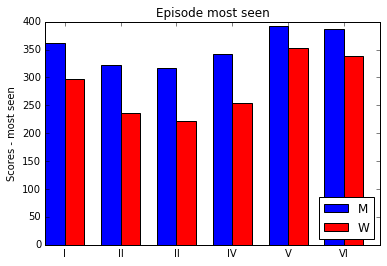

In [80]:
ind=np.arange(6)
width = 0.35 
fig, ax = plt.subplots()

rects1=ax.bar(ind,males[check_list_2].sum(),width=width)
rects2=ax.bar(ind+width,females[check_list_2].sum(),width=width,color='r')

ax.set_ylabel('Scores - most seen')
ax.set_title('Episode most seen')
ax.set_xticks((ind) + width)
ax.set_xticklabels(('I', 'II', 'II', 'IV', 'V','VI'))

ax.legend((rects1[0], rects2[0]), ('M', 'W'),loc=4)

We don't see any interesting patterns.

However we noticed that more males watches episodes 1-3, but males liked them far less than females did.

## Next Steps
Here are some potential next steps:

* Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
* Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
* Which character do respondents like the most?
* Which character do respondents dislike the most?
* Which character is the most controversial (split between likes and dislikes)?